### Biopsy gegevens inlezen

In [4]:
import IPython
import pandas as pd

IPython.InteractiveShell.ast_node_interactivity = 'all'

biopsy = pd.read_csv('datasets/biopsy.csv', sep=";", index_col=0)
biopsy

V1  V2  V3  V4  V5    V6  V7  V8  V9      class
ID                                                      
1000025   5   1   1   1   2   1.0   3   1   1     benign
1002945   5   4   4   5   7  10.0   3   2   1     benign
1015425   3   1   1   1   2   2.0   3   1   1     benign
1016277   6   8   8   1   3   4.0   3   7   1     benign
1017023   4   1   1   3   2   1.0   3   1   1     benign
...      ..  ..  ..  ..  ..   ...  ..  ..  ..        ...
776715    3   1   1   1   3   2.0   1   1   1     benign
841769    2   1   1   1   2   1.0   1   1   1     benign
888820    5  10  10   3   7   3.0   8  10   2  malignant
897471    4   8   6   4   3   4.0  10   6   1  malignant
897471    4   8   8   5   4   5.0  10   4   1  malignant

[699 rows x 10 columns]

### Input data maken
We verwijderen de laatste kolom (genaamd 'class'), deze bevat de aard van het gezwel (goedaardig vs. kwaadaardig)

In [3]:
X = biopsy.dropna().drop(columns=['class'])
y = biopsy.dropna()['class']
X

V1  V2  V3  V4  V5    V6  V7  V8  V9
ID                                           
1000025   5   1   1   1   2   1.0   3   1   1
1002945   5   4   4   5   7  10.0   3   2   1
1015425   3   1   1   1   2   2.0   3   1   1
1016277   6   8   8   1   3   4.0   3   7   1
1017023   4   1   1   3   2   1.0   3   1   1
...      ..  ..  ..  ..  ..   ...  ..  ..  ..
776715    3   1   1   1   3   2.0   1   1   1
841769    2   1   1   1   2   1.0   1   1   1
888820    5  10  10   3   7   3.0   8  10   2
897471    4   8   6   4   3   4.0  10   6   1
897471    4   8   8   5   4   5.0  10   4   1

[683 rows x 9 columns]

### PCA model maken met pca library
Niet vergeten van `pip install pca` te doen


In [15]:
from pca import pca
# voor n_components heb je twee opties:
# 1. je kan een percentage van de variantie overhouden, dit moet een float zijn tussen 0 en 1
# 2. je kan een aantal hoofdcomponenten overhouden, dit moet een integer zijn
model = pca(normalize=True, n_components=5) # default 99.999% van de variantie overhouden in de PC-componenten
# model = pca(normalize=True, n_components=4) # 4 hoofdcomponenten overhouden / 4 dimensie overhouden

out = model.fit_transform(X, verbose=False)

V1        V2        V3        V4        V5        V6        V7  \
PC1  0.302063  0.380793  0.377583  0.332724  0.336234  0.335068  0.345747   
PC2 -0.140801 -0.046640 -0.082422 -0.052094  0.164404 -0.261261 -0.228077   
PC3 -0.866372  0.019938 -0.033511  0.412647  0.087743 -0.000691  0.213072   
PC4 -0.107828  0.204255  0.175866 -0.493173  0.427384 -0.498618 -0.013047   
PC5 -0.080321  0.145653  0.108392  0.019569  0.636693  0.124773 -0.227666   

           V8        V9  
PC1  0.335591  0.230206  
PC2  0.033966  0.905557  
PC3  0.134248 -0.080492  
PC4  0.417113 -0.258988  
PC5 -0.690210 -0.105042

PC1       PC2       PC3       PC4       PC5
variance_ratio  0.6555  0.086216  0.059917  0.051070  0.042253
explained_var   0.6555  0.741716  0.801633  0.852703  0.894956

PC feature   loading  type
0  PC1      V2  0.380793  best
1  PC2      V9  0.905557  best
2  PC3      V1 -0.866372  best
3  PC4      V6 -0.498618  best
4  PC5      V8 -0.690210  best
5  PC1      V3  0.377583  weak
6  PC4      V4 -0.493173  weak
7  PC5      V5  0.636693  weak
8  PC1      V7  0.345747  weak

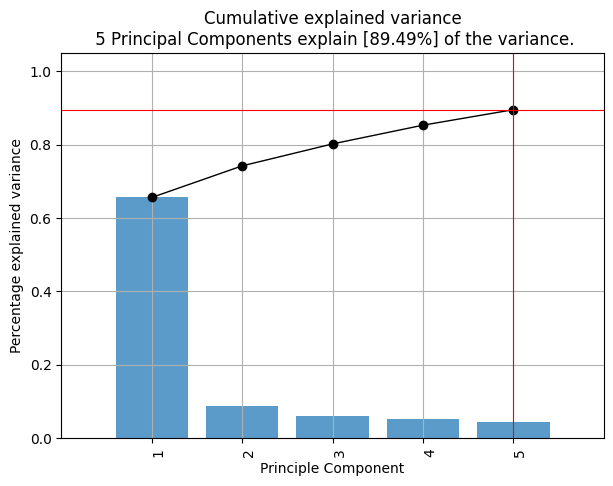

<Figure size 640x480 with 0 Axes>

In [16]:

A_mm = out['loadings']  # matrix met de coefficiënten van de PCA analyse
pd.DataFrame(A_mm)
pd.DataFrame(zip(out['variance_ratio'], out['explained_var']),
             index=[f'PC{i + 1}' for i in range(len(out['variance_ratio']))],
             columns=['variance_ratio', 'explained_var']).T
out['topfeat']
_ = model.plot(figsize=(7, 5))

[pca] >Plot PC1 vs PC2 with loadings.


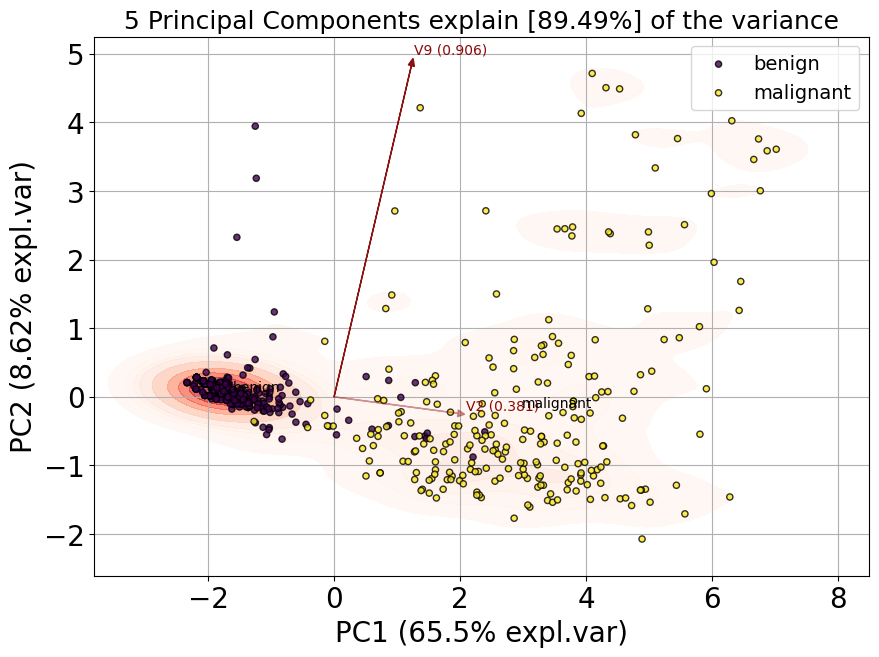

In [20]:
_ = model.biplot(cmap='viridis',
                 labels=y,
                 density=True,
                 n_feat=2,
                 s=20,
                 fontsize=10,
                 figsize=(10, 7))

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


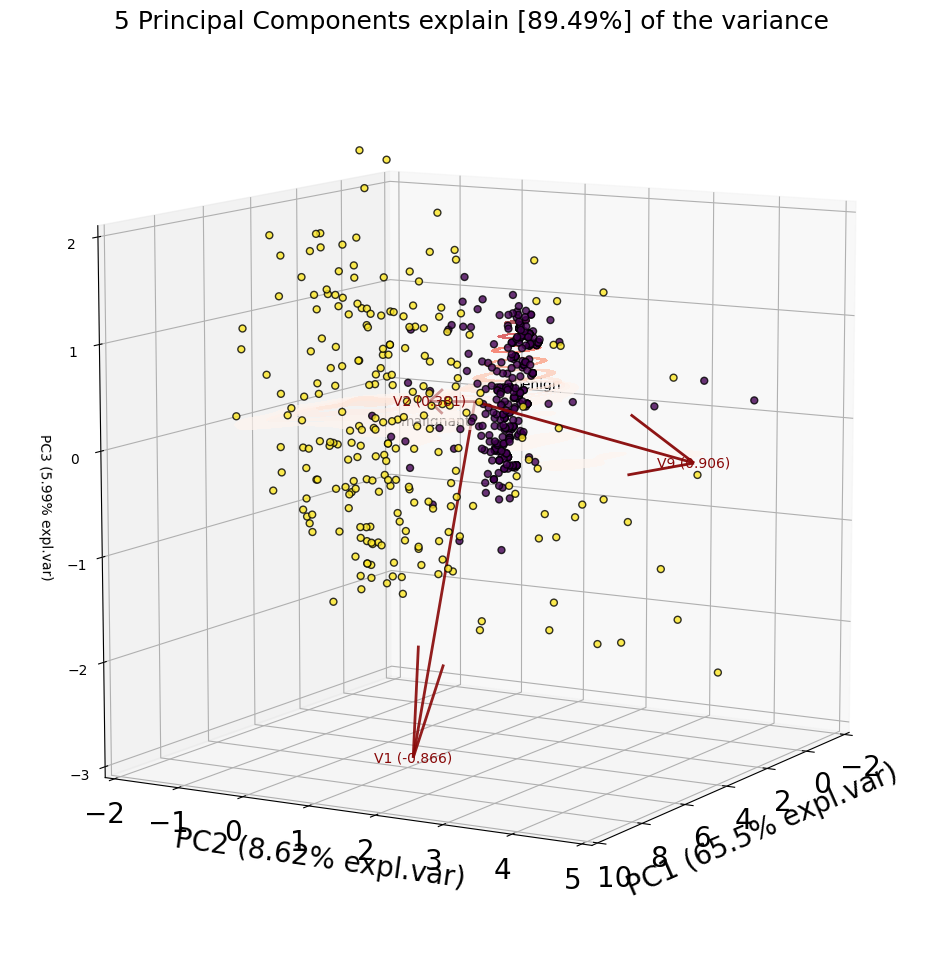

In [22]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 12))
_ = ax.view_init(azim=30, elev=10)
_ = ax.set_xlim(-2, 10)
_ = ax.set_ylim(-2, 5)
_ = ax.set_zlim(-3, 2)
_ = ax.set_box_aspect((1, 1, 1), zoom=1)
_ = model.biplot3d(ax=ax, legend=False, density=True, fontsize=10, s=25, n_feat=3, labels=y, cmap='viridis')

[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


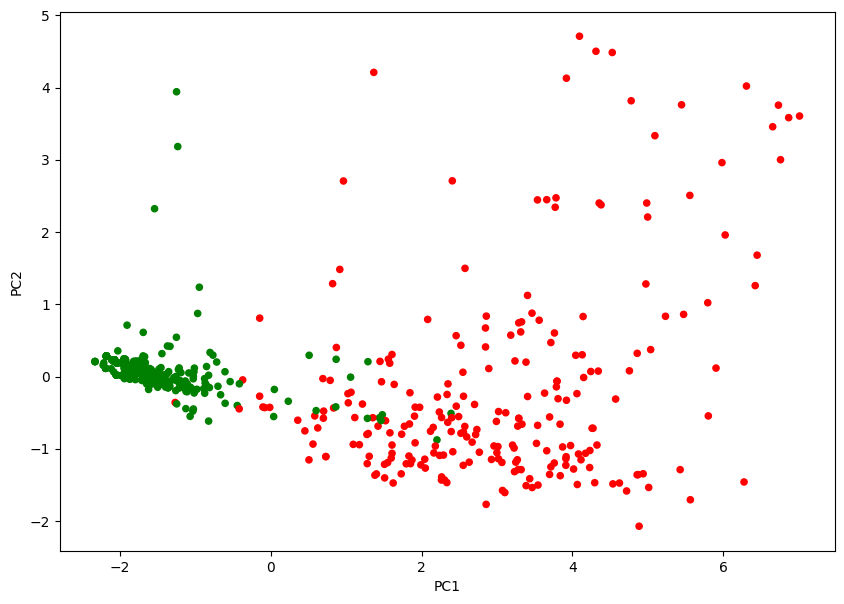

In [24]:
model = pca(normalize=True, n_components=2)  # 90% van de variantie overhouden in de PC componenten
_ = model.fit_transform(X, verbose=False)
colors = ['green' if biopsy_class == 'benign' else 'red' for biopsy_class in biopsy.dropna()['class']]
_ = model.transform(X).pipe(pd.DataFrame).plot(kind='scatter', x='PC1', y='PC2', c=colors, figsize=(10, 7))


In [25]:
model.transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


PC1       PC2
mapped -1.470171 -0.104273
mapped  1.442046 -0.570141
mapped -1.592478 -0.076120
mapped  1.479812 -0.528452
mapped -1.344862 -0.090719
...          ...       ...
mapped -1.723605  0.184232
mapped -2.074148  0.231929
mapped  3.789261 -0.142209
mapped  2.240007 -1.091287
mapped  2.632462 -1.184698

[683 rows x 2 columns]